# Která linka tramvaje je nejlepší na cestování s kočárkem?

## Autorka: Mgr. Anastázie Sedláková, PhD [sedlakovi.org](https://www.sedlakovi.org/)

Tento notebook je první ze série notebooků, kde zjišťuji, jak lze co nejpohodlněji cestovat s kočárkem v Praze. 
Cílem tohoto notebooku je určit, které tramvaje v Praze mají nejvíce a nejméně nízkopodlažních* spojů.

*Pozn. nepracuji tady s daty v reálném čase, takže se jedná o počet garantovaných nízkopodlažních vozů* 

## Data

[Pražská integrovaná doprava](https://pid.cz/o-systemu/opendata/) poskytuje otevřená data o provozu MHD. Některá data jsou aktualizovaná jednou za 14 dní a jsou ve formátu [GTFS](https://developers.google.com/transit/gtfs/reference). Jsou dostupná i data o provozu v reálném čase, ze kterých čerpají aplikace vyhledávající spojení.

Pro tento notebook jsem použila soubor [trips.txt](https://developers.google.com/transit/gtfs/reference#tripstxt) obsahující jizdní řády linek včetně informací o tom, zda se jedná o nízkopodlažní spoj.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
trips = pd.read_csv('./data/trips.txt')
trips.head()

/tmp/ipykernel_36563/3737955811.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('./data/trips.txt')


,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed,exceptional,sub_agency_id
0,L991,1111100-1,991_1342_220901,Nemocnice Motol,NaN,0,NaN,L991V1,1,1,0,1
1,L991,1111100-1,991_1343_220901,Depo Hostivař,NaN,1,NaN,L991V2,1,1,0,1
2,L991,1111100-1,991_1344_220901,Nemocnice Motol,NaN,0,NaN,L991V3,1,1,0,1
3,L991,1111100-1,991_1345_220901,Depo Hostivař,NaN,1,NaN,L991V4,1,1,0,1
4,L991,1111100-1,991_1346_220901,Nemocnice Motol,NaN,0,NaN,L991V5,1,1,0,1


Zajímají mě jen travaje, které jsou označeny `L` a číslo linky.

In [3]:
trams = [f'L{i}' for i in range(1,27)]

In [4]:
trips = trips[trips['route_id'].isin(trams)]
trips.shape

(18765, 12)

`wheelchair_accessible` obsahuje informaci zda se jedná o nízkopodlažní spoj (hodnota `1`) nebo ne (hodnota `2`).

In [5]:
trips.wheelchair_accessible.value_counts()

1    11833
2     6932
Name: wheelchair_accessible, dtype: int64

In [6]:
trips.wheelchair_accessible.value_counts()/trips.shape[0]

1    0.630589
2    0.369411
Name: wheelchair_accessible, dtype: float64

Skvělé je to, že více než dvě třetiny spojů jsou nízkopodlažní. Ale vyskytují se nízkopodlažní spoje u všech linek rovnoměrně? Abych to určila, spočítám pro každou linku procento nízkopodlažních spojů k celkovému počtu.

In [7]:
def compute_wheelchair_ratio(df):
    return (df[df['wheelchair_accessible'] == 1].shape[0]/ df.shape[0] )*100

In [8]:
wheelchair_ratio_df = pd.DataFrame(
    trips.groupby('route_id').apply(compute_wheelchair_ratio).sort_values(ascending=False).round(0),
    columns=['wheelchair_accessible_ratio']
).reset_index()
wheelchair_ratio_df['route_id'] = wheelchair_ratio_df['route_id'].str.replace('L', '')
wheelchair_ratio_df

,route_id,wheelchair_accessible_ratio
0,5,99.0
1,19,96.0
2,3,83.0
3,20,80.0
4,17,76.0
5,12,75.0
6,16,73.0
7,8,71.0
8,9,68.0
9,14,67.0


Gratuluji těm z vás, co bydlí na Žižkově a s kočárkem potřebují jezdit tramvají číslo 5 nebo 19, protože tyto tramvaje mají téměř všechny spoje nízkopodlažní.

Naopak linka 23 a 21 nemají žádné nízkopodlažní spoje. V případě tramvaje 23, se jedná o [nostalgickou linku](https://pid.cz/nostalgicka-linka-23/), kde jezdí nerekonstruované vysokopodlažní vozy T3. Ti, co jezdí linkou 21 asi prostě mají smůlu.

Já patřím k těm, kdo by měli ve špičce čekat na nízkopodlažní třináctku hodinu.

In [9]:
palette = sns.color_palette("RdYlGn", n_colors=26)
palette.reverse()
palette

[(0.03598615916955017, 0.4742791234140715, 0.2502883506343714),
 (0.07197231833910034, 0.5407151095732411, 0.2848904267589389),
 (0.13118031526336021, 0.6103037293348712, 0.32103037293348713),
 (0.23637062668204534, 0.6615148019992311, 0.34732795078815837),
 (0.3532487504805844, 0.7184159938485198, 0.3765474817377932),
 (0.44921184159938493, 0.7627066512879662, 0.3936178392925798),
 (0.5476355247981547, 0.805767012687428, 0.40438292964244527),
 (0.6362168396770479, 0.8445213379469437, 0.4140715109573242),
 (0.7176470588235296, 0.8797385620915034, 0.45882352941176485),
 (0.7882352941176473, 0.9101883890811228, 0.5044982698961938),
 (0.8626682045367168, 0.9421760861207229, 0.5610918877354865),
 (0.9152633602460593, 0.964321414840446, 0.6330642060745868),
 (0.9737024221453289, 0.9889273356401385, 0.7130334486735873),
 (0.9993079584775086, 0.9785467128027682, 0.7130334486735871),
 (0.9977700884275279, 0.930872741253364, 0.6330642060745867),
 (0.9963860053825452, 0.8879661668589004, 0.5610918877354863),
 (0.9948481353325644, 0.8169165705497885, 0.4934256055363321),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587),
 (0.990080738177624, 0.6673587081891579, 0.37347174163783153),
 (0.9776239907727797, 0.5773933102652824, 0.33194925028835054),
 (0.9637831603229527, 0.47743175701653207, 0.28581314878892733),
 (0.9390234525182622, 0.3899269511726259, 0.24552095347943098),
 (0.8944252210688197, 0.29611687812379844, 0.20246059207996922),
 (0.8542868127643214, 0.2116878123798539, 0.1637062668204537),
 (0.7854671280276817, 0.1328719723183391, 0.15178777393310267),
 (0.7162629757785467, 0.06643598615916955, 0.15040369088811995)]

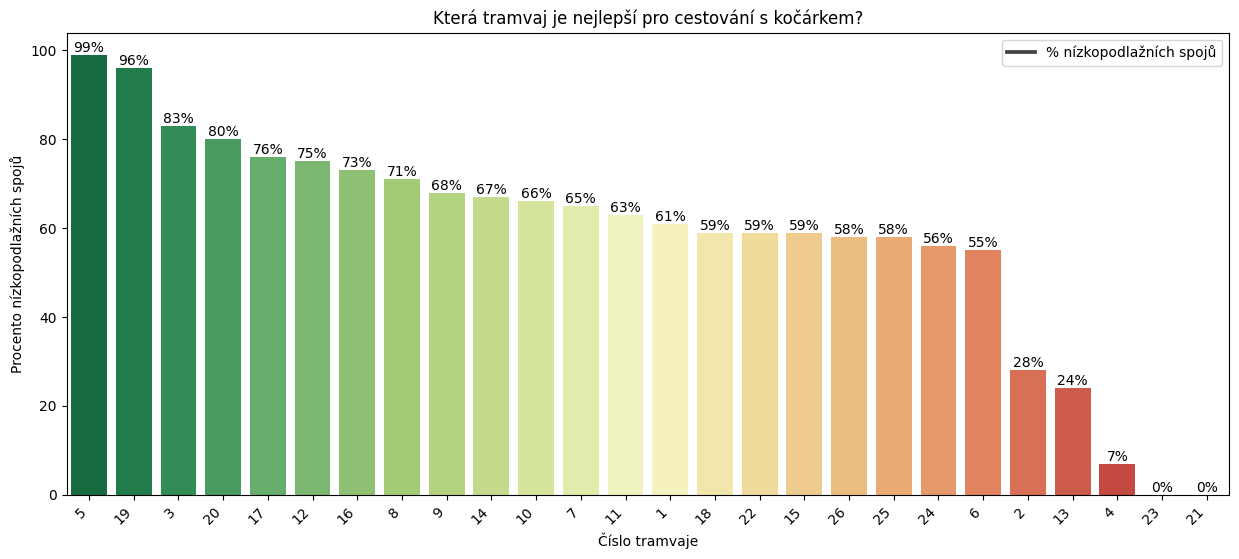

In [10]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(
    x='route_id', y='wheelchair_accessible_ratio', data=wheelchair_ratio_df.reset_index(),
    palette=palette,
)
plt.xticks(rotation=45, ha='right')
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title('Která tramvaj je nejlepší pro cestování s kočárkem?')
plt.xlabel('Číslo tramvaje')
plt.ylabel('Procento nízkopodlažních spojů')
plt.legend(loc='upper right', labels=['% nízkopodlažních spojů'])
plt.show()